# Regra dos trapézios, regra dos trapézios repetidos e regra de simpson repetida

# Exercício

### Função polinomial
$$ p(x) = 2x^2 - x^3 $$

### Função exponencial

$$ e(x) = 3e^{-2x}$$

### Função senoidal

$$ s(x) = 1+2\sin(2x)$$

In [20]:
import numpy as np


# Função Polinomila p(x)
def p(x):
  y = 2*x**2 - x**3
  return y


def trapeziosRepetidosPolinomio(x):
  n = len(x)
  h = x[1] - x[0]
  soma = (p(x[0])+p(x[n-1]))
  for e in x[1:n-1]:
    soma = soma + 2*p(e)
  y = soma * h/2
  return y

xP = np.arange(0, 2.5, 0.5)
print(xP)
Itrp = trapeziosRepetidosPolinomio(xP)
print(f"Itr_polinomial = {Itrp}")

# Função Exponencial e(x)
def e(x):
  y = 3*np.exp(-2*x) 
  return y


def trapeziosRepetidosExponencial(x):
  n = len(x)
  h = x[1] - x[0]
  soma = (e(x[0])+e(x[n-1]))
  for i in x[1:n-1]:
    soma = soma + 2*e(i)
  y = soma * h/2
  return y


xE = np.arange(1, 2, 0.2)
print(xE)
Itre = trapeziosRepetidosExponencial(xE)
print(f"Itr_exponencial = {Itre}")

# Função Senoidal s(x)
def s(x):
  y = 1+2*np.sin(2*x)
  return y


def trapeziosRepetidosSenoidal(x):
  n = len(x)
  h = x[1] - x[0]
  soma = (s(x[0])+s(x[n-1]))
  for e in x[1:n-1]:
    soma = soma + 2*s(e)
  y = soma * h/2
  return y

xS = np.arange(0, 2.5, 0.5)
print(xS)
Itrs = trapeziosRepetidosSenoidal(xS)
print(f"Itr_exponencial = {Itrs}")

[0.  0.5 1.  1.5 2. ]
Itr_polinomial = 1.25
[1.  1.2 1.4 1.6 1.8]
Itr_exponencial = 0.16417183364096957
[0.  0.5 1.  1.5 2. ]
Itr_exponencial = 3.513487172039482


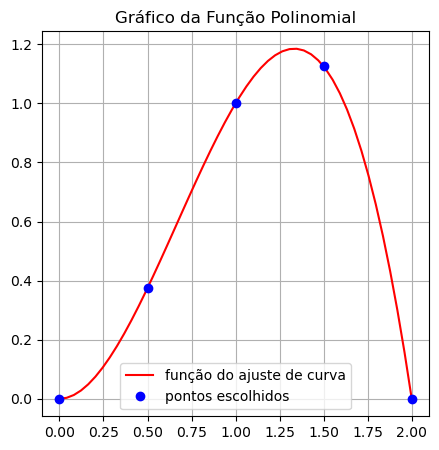

Integral aproximada = 1.2500000000000002
Integral nos 5 pontos = 1.25


In [37]:
import matplotlib.pyplot as plt
import math


class MQ:

  def __init__(self):
    self.alfas = []

  def fit(self, X, Y, G):
    self.alfas = []
    self.G = G

    B = []
    A = []
    j = 0
    for g_lin in G:
      b = 0
      for i in range(0, len(X)):
        b += g_lin(X[i]) * Y[i]
      B.append(b)
      A.append([])
      for g_col in G:
        a = 0
        for i in range(0, len(X)):
          a += g_lin(X[i]) * g_col(X[i])
        A[j].append(a)
      j += 1
    self.alfas = np.linalg.solve(A, B)
    # print("A:",A)
    # print("alfas:", self.alfas)
    # print("B:",B)

  def calc(self, x):
    s = 0
    for i in range(0, len(self.G)):
      s += self.alfas[i] * self.G[i](x)
    return s

  def calc_exp(self, x):
    return math.e**self.alfas[0] * (math.e**(-(-self.alfas[1]) * x))
                  #a1                           #a2

  def calc_hiperbole(self, x):
    return 1/(self.alfas[0] + (self.alfas[1]*x))

  def calc_seno(self, x):
    return self.alfas[0] + self.alfas[1] * np.sin(2*x)

# Definindo os 5 pts da função polinomial
mq = MQ()
yP = [ p(x) for x in xP ]
mq.fit(xP, yP, [lambda x: 1, lambda x: x, lambda x: x**2, lambda x: x**3])
xP_line = np.linspace(min(xP), max(xP), 50)
yP_line = list(map(lambda x: mq.calc(x), xP_line))
xOs = np.linspace(min(xP), max(xP), 100)
fig = plt.figure(figsize=(5,5))
plt.plot(xP_line, yP_line, 'r-', label="função do ajuste de curva")
plt.plot(xP, yP, 'bo', label="pontos escolhidos")
plt.title("Gráfico da Função Polinomial")
plt.legend()
plt.grid()
plt.show()

def trapeziosRepetidosPolinomioAproximado(x):
  n = len(x)
  h = x[1] - x[0]
  soma = (mq.calc(x[0])+mq.calc(x[n-1]))
  for e in x[1:n-1]:
    soma = soma + 2*mq.calc(e)
  y = soma * h/2
  return y

Itrpa = trapeziosRepetidosPolinomioAproximado(xP)
print(f"Integral aproximada = {Itrpa}")
print(f"Integral nos 5 pontos = {Itrp}")

---

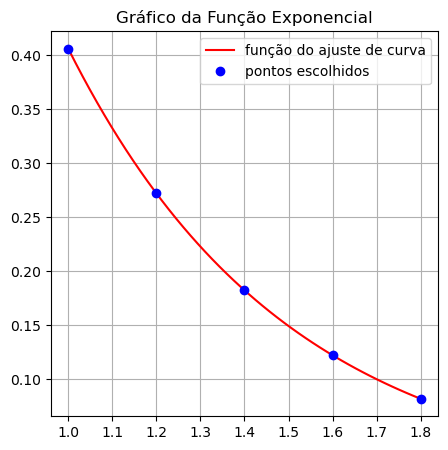

Integral aproximada = 0.16417183364096957
Integral nos 5 pontos = 0.16417183364096957


In [39]:
# Definindo os 5 pts da função exponencial
mq = MQ()
yE = [ e(x) for x in xE ]
yELog = [np.log(y) for y in yE]
mq.fit(xE, yELog, [lambda x: 1, lambda x: x])
xE_line = np.linspace(min(xE), max(xE), 50)
yE_line = list(map(lambda x: mq.calc_exp(x), xE_line))
fig = plt.figure(figsize=(5,5))
plt.plot(xE_line, yE_line, 'r-', label="função do ajuste de curva")
plt.plot(xE, yE, 'bo', label="pontos escolhidos")
plt.title("Gráfico da Função Exponencial")
plt.legend()
plt.grid()
plt.show()

def trapeziosRepetidosExponencialAproximada(x):
  n = len(x)
  h = x[1] - x[0]
  soma = (mq.calc_exp(x[0])+mq.calc_exp(x[n-1]))
  for e in x[1:n-1]:
    soma = soma + 2*mq.calc_exp(e)
  y = soma * h/2
  return y

Itrea = trapeziosRepetidosExponencialAproximada(xE)
print(f"Integral aproximada = {Itrea}")
print(f"Integral nos 5 pontos = {Itre}")

---

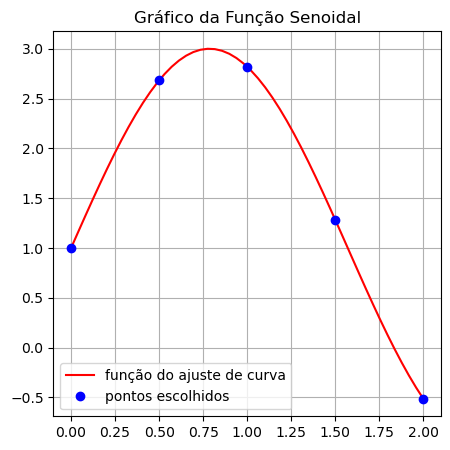

Integral aproximada = 3.513487172039482
Integral nos 5 pontos = 3.513487172039482


In [38]:
# Definindo os 5 pts da função senoidal
mq = MQ()
yS = [ s(x) for x in xS ]
mq.fit(xS, yS, [lambda x: 1, lambda x: np.sin(2*x)])
xS_line = np.linspace(min(xS), max(xS), 50)
yS_line = list(map(lambda x: mq.calc_seno(x), xS_line))
fig = plt.figure(figsize=(5,5))
plt.plot(xS_line, yS_line, 'r-', label="função do ajuste de curva")
plt.plot(xS, yS, 'bo', label="pontos escolhidos")
plt.title("Gráfico da Função Senoidal")
plt.legend()
plt.grid()
plt.show()

def trapeziosRepetidosSenoidalAproximada(x):
  n = len(x)
  h = x[1] - x[0]
  soma = (mq.calc_seno(x[0])+mq.calc_seno(x[n-1]))
  for e in x[1:n-1]:
    soma = soma + 2*mq.calc_seno(e)
  y = soma * h/2
  return y

Itrsa = trapeziosRepetidosSenoidalAproximada(xS)
print(f"Integral aproximada = {Itrsa}")
print(f"Integral nos 5 pontos = {Itrs}")